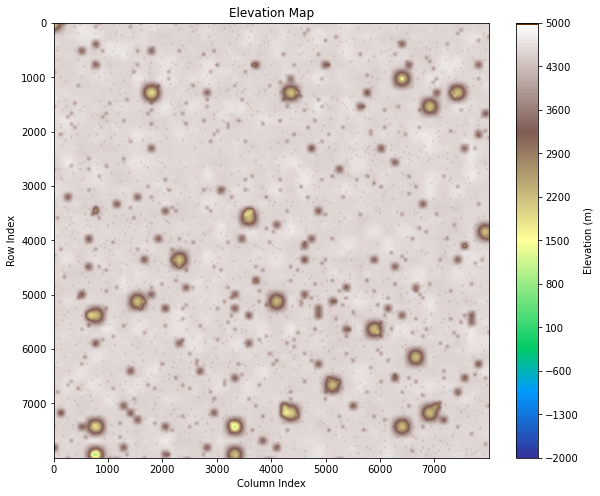

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

# 读取 .asc 文件
def read_asc(file_path):
    with open(file_path, 'r') as file:
        # read asc
        ncols = int(file.readline().split()[1])
        nrows = int(file.readline().split()[1])
        xllcorner = float(file.readline().split()[1])
        yllcorner = float(file.readline().split()[1])
        cellsize = float(file.readline().split()[1])
        NODATA_value = float(file.readline().split()[1])

        # read data
        data = np.loadtxt(file, skiprows=0)

    return data, ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value

# colormap
def create_custom_cmap():
    cmap = cm.get_cmap('terrain', 256)
    new_colors = cmap(np.linspace(0, 1, 256))
    new_colors[-1] = [0.4, 0.2, 0.0, 1]  # 深棕色
    custom_cmap = colors.ListedColormap(new_colors)
    return custom_cmap

# visualization
def visualize_elevation(data, vmin=-4000, vmax=5000, save_path=None):
    plt.figure(figsize=(10, 8))
    cmap = create_custom_cmap()
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    plt.imshow(data, cmap=cmap, norm=norm)
    cbar = plt.colorbar(label='Elevation (m)')
    cbar.set_ticks(np.linspace(vmin, vmax, num=11))  # 设置 color bar 的标签范围
    plt.title('Elevation Map')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, facecolor='white')
    plt.show()

# change it to your .asc file path
asc_file_path = 'C:/Users/AdaSong/Desktop/visualization/gaoyuan.asc'
save_path = 'C:/Users/AdaSong/Desktop/visualization/height/gaoyuan.png'

# read and visualize
data, ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value = read_asc(asc_file_path)
visualize_elevation(data, vmin=-2000, vmax=5000, save_path=save_path)